In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%cd /Midgard/home/amirme/an_explanation_model
from source.project_manager import (
    load_experiment_metadata,
    delete_experiment_data,
    check_file_exists,
)
from source.data_manager import plot_masks,preprocess_masks,symmetric_minmax_normalize,minmax_normalize,sum_channels
from source.labels import IMAGENET_LABELS

/Midgard/home/amirme/an_explanation_model


2023-09-15 09:30:14.174209: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-15 09:30:15.236707: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/Midgard/home/amirme/miniconda3/envs/xmodel/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
project_metadata = load_experiment_metadata(glob_path="experiment_2/*")
project_metadata = project_metadata.set_index(
    [
        "stream_name",
        "image_index",
        "stream_statistic",
        "alpha_mask_value",
        "projection_top_k",
        "output_layer",
    ]
).sort_index()
project_metadata = project_metadata.loc["vanilla_grad_mask",]
print(project_metadata.columns)
print(project_metadata.shape)

Index(['method', 'alpha_mask_type', 'projection_type', 'baseline_mask_type',
       'write_demo', 'architecture', 'max_batches', 'min_change', 'seed',
       'batch_size', 'num_classes', 'input_shape', 'monitored_statistic',
       'monitored_stream', 'dataset', 'label', 'image_path', 'time_to_compute',
       'batch_index', 'monitored_statistic_change', 'data_path',
       'csv_file_path'],
      dtype='object')
(1200, 22)


In [3]:
vc = project_metadata.index.value_counts()
print(vc)
print(len(vc))

image_index  stream_statistic  alpha_mask_value  projection_top_k  output_layer
3            meanx             0.2               1                 log_softmax     1
9            meanx2            0.3               9                 softmax         1
                                                                   log_softmax     1
                                                 8                 softmax         1
                                                                   logits          1
                                                                                  ..
5            meanx             0.5               4                 log_softmax     1
                                                 3                 softmax         1
                                                                   logits          1
                                                                   log_softmax     1
11           meanx2            0.6               10                sof

['projection_top_k', 'output_layer']


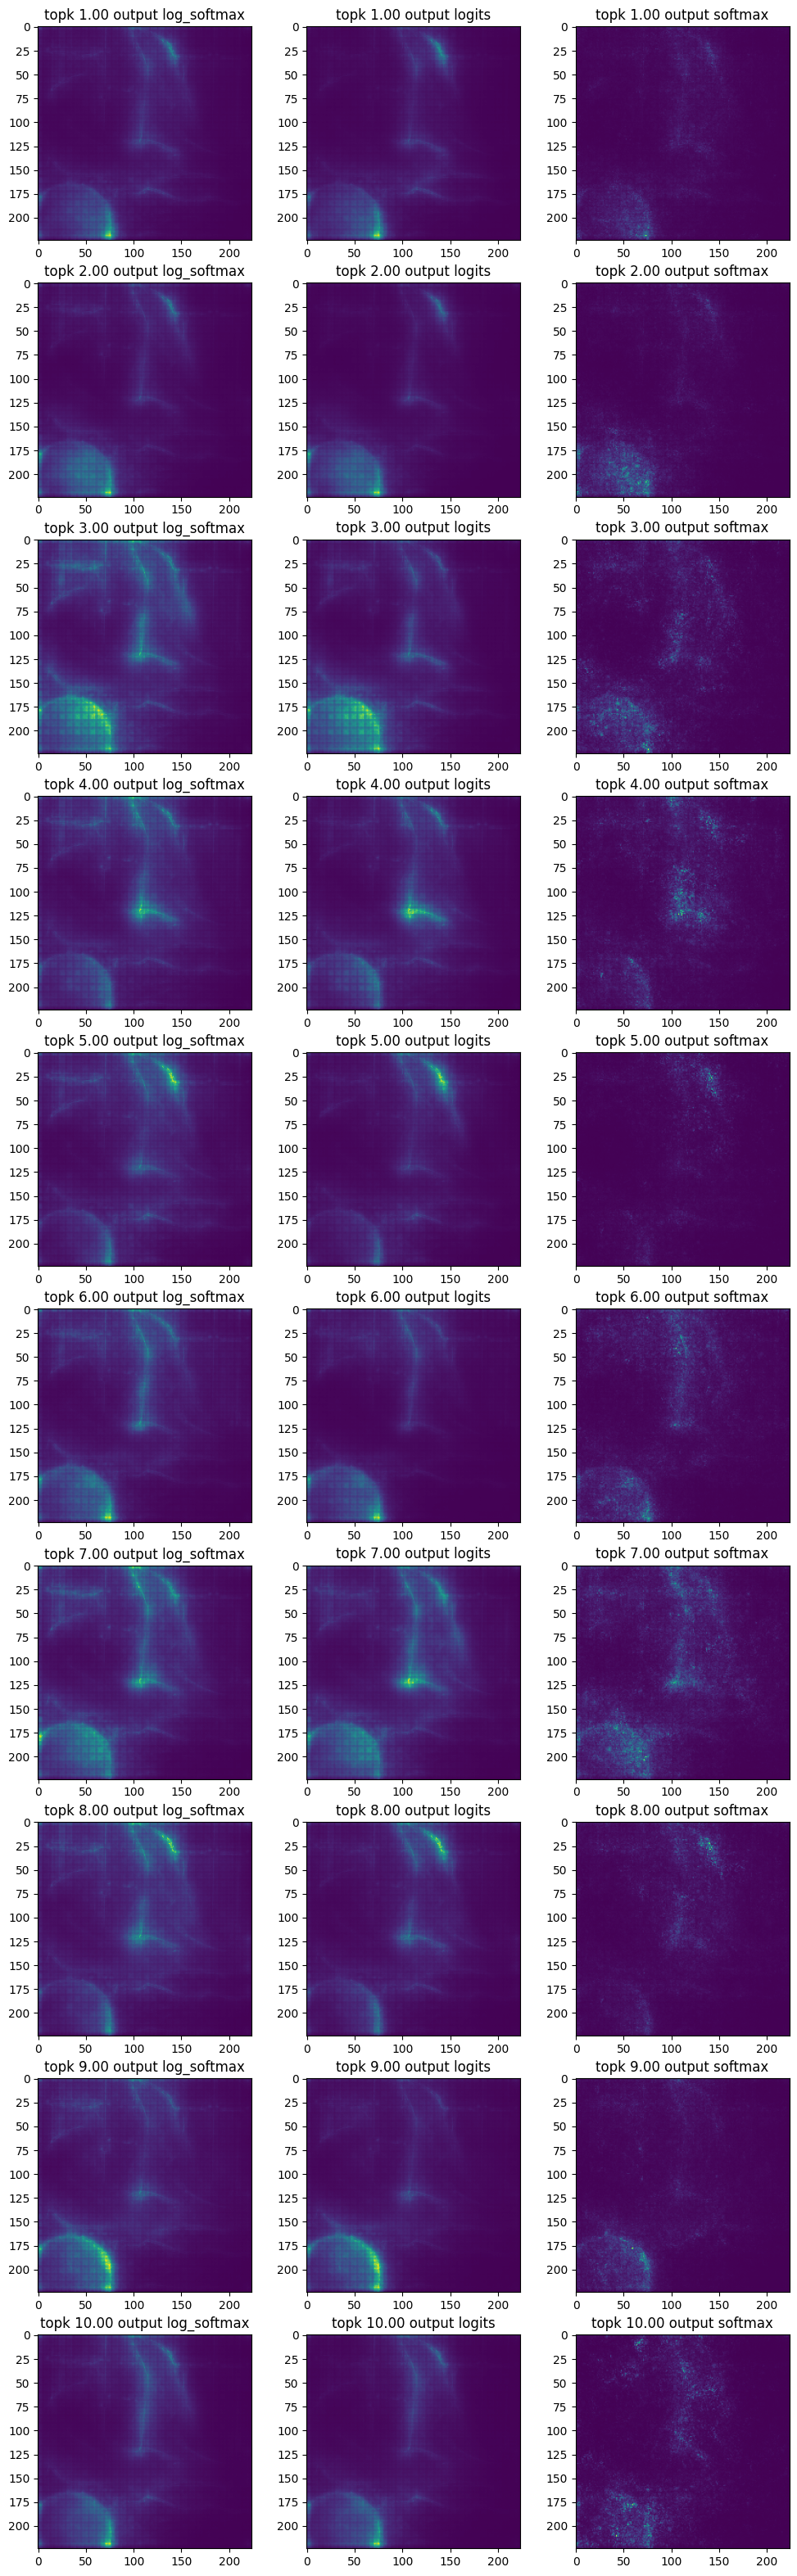

In [12]:
imshow_args = {"cmap": "viridis"}
alpha = 0.3
image_index = 5
meanx2 = project_metadata.loc[
    (
        image_index,
        "meanx2",
        alpha,
    ),
    "data_path",
].apply(lambda x: np.load(x))
meanx = project_metadata.loc[
    (
        image_index,
        "meanx",
        alpha,
    ),
    "data_path",
].apply(lambda x: np.load(x))
var = meanx2 - meanx**2
var = preprocess_masks(var, preprocesses=[sum_channels, minmax_normalize])
print(var.index.names)
titles = var.index.to_series().apply(lambda x: f"projection {x[0]:.2f} output {x[1]}")
plot_masks(var, titles=titles, imshow_args=imshow_args, ncols=3)